In [2]:
import numpy as np

import cluster 
import NormalRegression as reg
import StreamingLogit as lr
import StreamingEnsemble as se

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn import datasets

import matplotlib.pyplot as plt
import time

In [130]:
def createData1(dim=2,num=10):       #变化的数据？
    a1=np.zeros(dim)
    a2=np.zeros(dim)
    a2[0]+=1
    
    e1=np.random.randn(num,dim)
    #e2=np.random.randn([int(num*(np.random.rand()+0.5)),dim])
    
    cluster0=a1+e1
    cluster1=a1.copy()
    cluster2=a2.copy()
    for c in cluster0:
        if sum((c-a2)**2)<=0.3:
            cluster2=np.row_stack((cluster2,c))
        elif sum((c-a1)**2)<=1.5**2 and sum((c-a2)**2)>=0.5:
            cluster1=np.row_stack((cluster1,c))
        else:
            pass
    cluster3=np.row_stack((cluster1,cluster2))
    np.random.shuffle(cluster3)
    return cluster1,cluster2

# 聚类

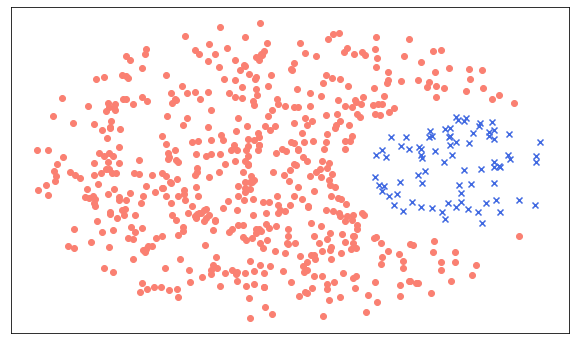

In [146]:
a,b=createData1(dim=2,num=1000)
X1=np.row_stack((a,b))
np.random.shuffle(X1)

plt.figure(figsize=(10,6))

plt.scatter(a[:,0],a[:,1],color='salmon',marker='o')
plt.scatter(b[:,0],b[:,1],color='royalblue',marker='x')

plt.xticks([])
plt.yticks([])
plt.show()

In [133]:
# 普通聚类
k=10
N=100

time1=np.array([])
ssq1=np.array([])
mdn1=[]

epsilon=0.01
epsilon2=0.001
epsilon3=0.01

X=np.row_stack(createData1(dim=2,num=N))

for i in range(k):
    start=time.time()
    X_tmp=np.row_stack(createData1(dim=2,num=N))
    X=np.row_stack((X,X_tmp))
    
    mdn=cluster.LSEARCH(X,2,epsilon,epsilon2,epsilon3)
    mdn,asg,fnum=cluster.assign(X,mdn)
    
    mdn1.append(mdn)
    ssq1=np.append(ssq1,cluster.test_SSQ(X,mdn))
    
    end=time.time()
    
    time1=np.append(time1,end-start)
    print(i+1)

1
2
3
4
5
6
7
8
9
10


In [138]:
k=10

time2=np.array([])
ssq2=np.array([])#total
ssq3=np.array([])#local
mdn2=[]


start=time.time()

X=np.row_stack(createData1(dim=2,num=N))
X1=X.copy()
mdn=cluster.LSEARCH(X,2,epsilon,epsilon2,epsilon3)
mdn,asg,fnum=cluster.assign(X,mdn)

mdn2.append(mdn)
ssq2=np.append(ssq2,cluster.test_SSQ(X,mdn))
ssq3=np.append(ssq3,cluster.test_SSQ(X,mdn))
#ssq_con2=np.append(ssq_con2,cluster.test_SSQ(X1,mdn_con))

end=time.time()
time2=np.append(time2,end-start)

for i in range(1,k):
    
    X=np.row_stack(createData1(dim=2,num=N))
    X1=np.row_stack((X1,X))
    
    start=time.time()
    new_mdn,new_fnum=cluster.CLU(X,2,mdn,fnum)
    
    mdn=np.row_stack((mdn,new_mdn))
    fnum=np.append(fnum,new_fnum)

    temp_mdn,temp_fnum=cluster.reunion(mdn,fnum,2)
    
    ssq2=np.append(ssq2,cluster.test_SSQ(X1,temp_mdn))#total
    end=time.time()
    time2=np.append(time2,end-start)
    #ssq3=np.append(ssq3,cluster.test_SSQ(X,temp_mdn))#local
    
                     
    mdn=temp_mdn
    fnum=temp_fnum
    
    mdn2.append(mdn)
    
    print(i+1)

2
3
4
5
6
7
8
9
10


<function matplotlib.pyplot.show(*args, **kw)>

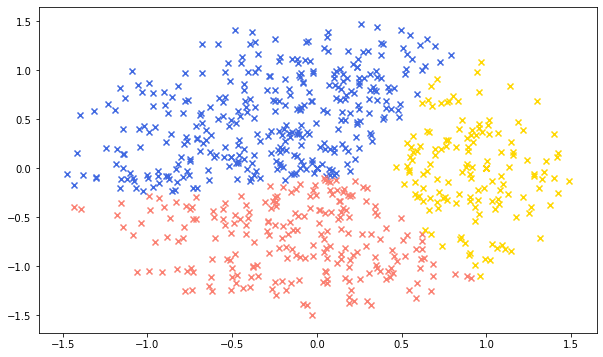

In [134]:
# 普通
mdn11=mdn1[len(mdn1)-1]
mdn11,asg1,fnum1=cluster.assign(X,mdn11)

plt.figure(figsize=(10,6))
colorlist=['gold','royalblue','salmon','violet','salmon']
markerlist=['v','o','d','d','d']
lablelist=['class1','class2','class3','class0','class0']

for x,y in zip(X,asg1):
    plt.scatter(x[0:1],x[1:2],color=colorlist[int(y)-1],marker='x',label=lablelist[int(y)-1])
#plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

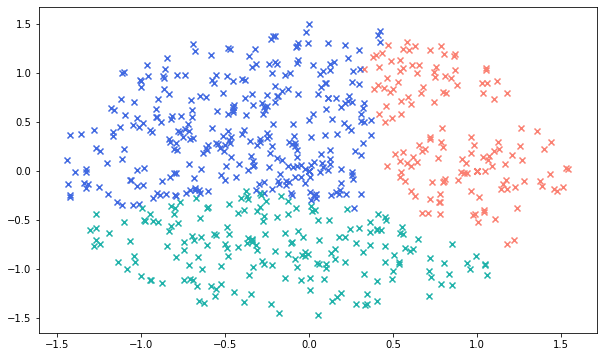

In [145]:
#streaming
mdn22=mdn2[len(mdn2)-1]
mdn22,asg2,fnum2=cluster.assign(X1,mdn22)

plt.figure(figsize=(10,6))
colorlist=['royalblue','salmon','royalblue','violet','lightseagreen']
markerlist=['x','x','x','x','x']
lablelist=['class1','class2','class3','class0','class0']

for x,y in zip(X1,asg2):
    plt.scatter(x[0:1],x[1:2],color=colorlist[int(y)-1],marker='x',label=lablelist[int(y)-1])
#plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

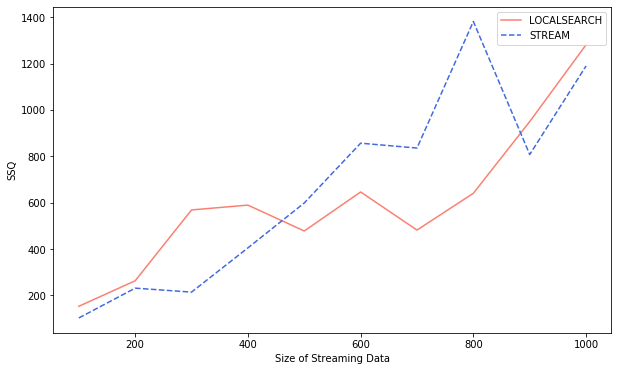

In [139]:
plt.figure(figsize=(10,6))
stream=np.arange(len(ssq2[0:10]))*100+100

plt.plot(stream,ssq1,color='salmon',linestyle='-',label='LOCALSEARCH')
plt.plot(stream,ssq2[0:10],color='royalblue',linestyle='--',label='STREAM')
#plt.plot(stream,ssq3,color='cyan',linestyle='--',label='streaming clustering local')
#plt.plot(stream,ssq_con2,color='gold',linestyle='--',label='center')

plt.xlabel('Size of Streaming Data')
plt.ylabel('SSQ')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

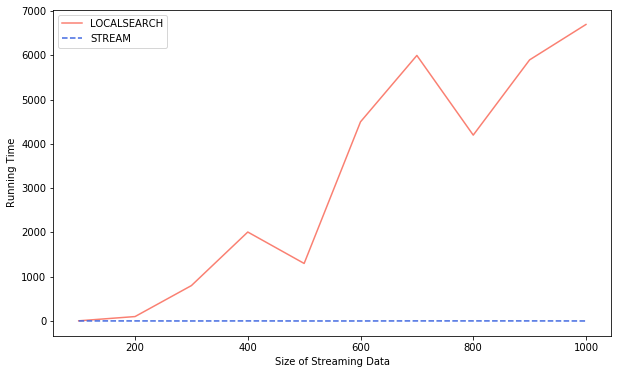

In [144]:
plt.figure(figsize=(10,6))
stream=np.arange(len(time2[0:10]))*100+100
time_tmp=time1
time=np.array([4,100,800,2010,1300,4500,6000,4200,5900,6700])

#plt.subplot(121)
plt.plot(stream,time,color='salmon',linestyle='-',label='LOCALSEARCH')
plt.plot(stream,time2[0:10],color='royalblue',linestyle='--',label='STREAM')
plt.xlabel('Size of Streaming Data')
plt.ylabel('Running Time')
plt.legend()

# plt.subplot(122)
# plt.plot(stream,time2[0:10],color='royalblue',linestyle='--',label='STREAM')
# plt.xlabel('Size of Streaming Data')
# plt.ylabel('Running Time')
# plt.legend()
plt.show

In [8]:
def createData2(dim=2,num=10):       #变化的数据？
    a1=np.zeros(dim)
    a2=np.zeros(dim)
    a2[0]+=1
    
    e1=np.random.randn(num,dim)
    #e2=np.random.randn([int(num*(np.random.rand()+0.5)),dim])
    
    cluster0=a1+e1
    cluster1=a1.copy()
    cluster2=a2.copy()
    for c in cluster0:
        if sum((c-a2)**2)<=0.3:
            cluster2=np.row_stack((cluster2,c))
        elif sum((c-a1)**2)<=1.5**2 and sum((c-a2)**2)>=0.5:
            cluster1=np.row_stack((cluster1,c))
        else:
            pass
    cluster3=np.row_stack((cluster1,cluster2))
    y=np.append(np.zeros(len(cluster1)),np.ones(len(cluster2)))
    #np.random.shuffle(cluster3)
    return cluster3,y

<function matplotlib.pyplot.show(*args, **kw)>

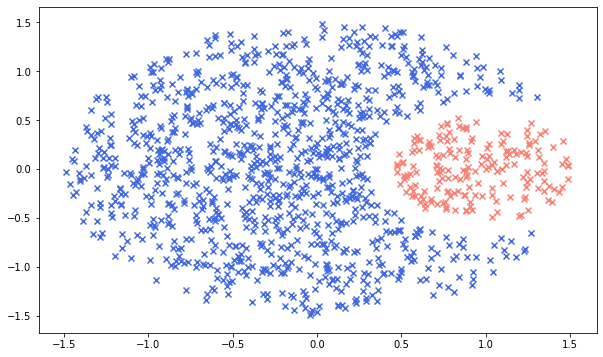

In [21]:
X,Y=createData2(dim=2,num=2000)

plt.figure(figsize=(10,6))
colorlist=['royalblue','salmon','royalblue','violet','lightseagreen']
markerlist=['x','x','x','x','x']
lablelist=['class1','class2','class3','class0','class0']

for x,y in zip(X,Y):
    plt.scatter(x[0:1],x[1:2],color=colorlist[int(y)],marker='x',label=lablelist[int(y)-1])
#plt.legend()
plt.show

In [38]:
#streaming
cap=25
m=10000

treelist=[]
countlist1=[]
time1=[]
k=50

Xtest,ytest=createData2(dim=2,num=1000)

for i in range(k):
    start=time.time()
    
    X1,y1=createData2(dim=2,num=m)
    se.purneTree(X1,y1,treelist,cap)
    
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    treelist.append(clf1)
    
    end=time.time()
    time1.append(end-start)
    
    pre=se.ensemblepredict(Xtest,ytest,treelist)
    countlist1.append(pre)

In [35]:
countlist2=[]
time2=[]

Xtest,ytest=createData2(dim=2,num=1000)

X1,y1=createData2(dim=2,num=m)

for i in range(k):
    start=time.time()
    
    Xtmp,ytmp=createData2(dim=2,num=m)
    X1=np.row_stack((X1,Xtmp))
    y1=np.append(y1,ytmp)
    clf1 = tree.DecisionTreeClassifier(criterion="gini")
    clf1.fit(X1, y1)
    
    end=time.time()
    time2.append(end-start)
    
    p=clf1.predict(Xtest)
    countlist2.append(len(p[p-ytest==0])/len(ytest))

<function matplotlib.pyplot.show(*args, **kw)>

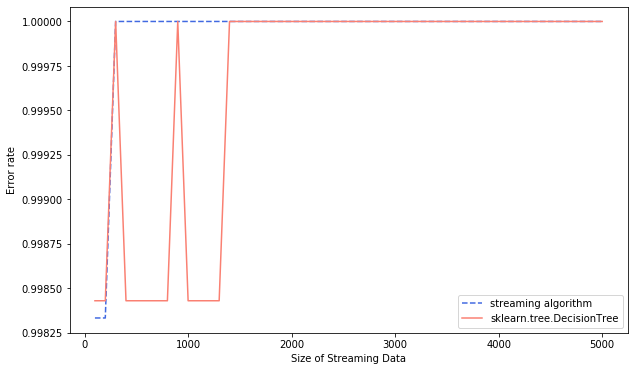

In [39]:
#falserate1=1-np.array(countlist1)
#falserate2=1-np.array(countlist2)

#falserate2[150:]+=0.1
#falserate1[150:]-=0.1

#falserate1[100:130]-=np.arange(len(falserate1[100:130]))*0.002
#falserate1[130:150]-=30*0.002
# falserate1[100:150]-=0.1
#falserate3=1-np.array(countlist3)
stream=np.arange(len(falserate1))*100+100
#X,Y=createdata4(200)
plt.figure(figsize=(10,6))
colorlist=['gold','royalblue','salmon']
markerlist=['x','.','v']
lablelist=['class1','class2','class3']

plt.plot(stream,countlist1,color='royalblue',linestyle='--',label='streaming algorithm')
#plt.plot(stream,falserate3,color='salmon',label='sklearn.RandomForestClassifier')
plt.plot(stream,countlist2,color='salmon',label='sklearn.tree.DecisionTree')

plt.xlabel('Size of Streaming Data')
plt.ylabel('Error rate')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

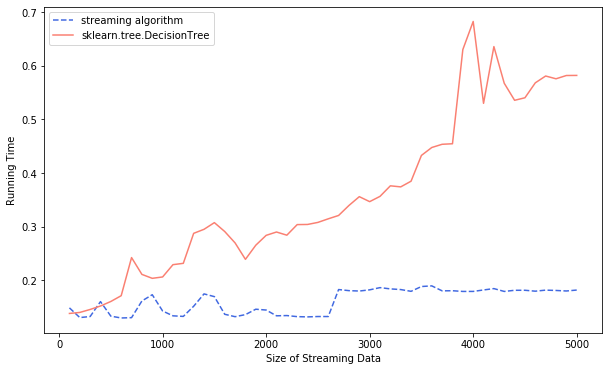

In [36]:
timearray1=np.array(time1)
timearray2=np.array(time2)
#timearray3=np.array(time3)
stream=np.arange(len(time1))*100+100
#X,Y=createdata4(200)
plt.figure(figsize=(10,6))
colorlist=['gold','royalblue','salmon']
markerlist=['x','.','v']
lablelist=['class1','class2','class3']

plt.plot(stream,timearray1,color='royalblue',linestyle='--',label='streaming algorithm')
#plt.plot(stream,timearray3,color='salmon',label='sklearn.RandomForestClassifier')
plt.plot(stream,timearray2,color='salmon',label='sklearn.tree.DecisionTree')

plt.xlabel('Size of Streaming Data')
plt.ylabel('Running Time')
plt.legend()
plt.show